<Axes: xlabel='x', ylabel='y'>

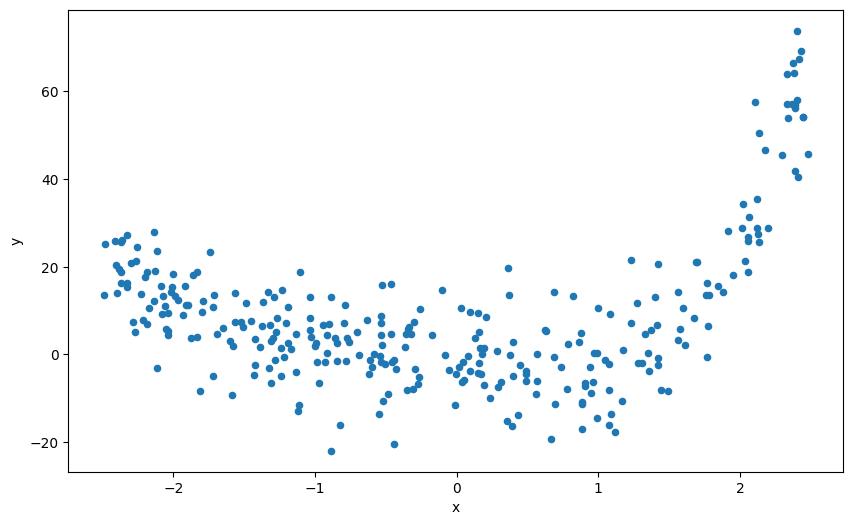

In [34]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y', figsize=(10, 6))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[6.87270587] [[3.86716472]]


In [37]:
import sklearn.neighbors

knn_reg_3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg_3.fit(X_train, y_train)
print("knn_3:", knn_reg_3.predict([[0]]))

knn_reg_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg_5.fit(X_train, y_train)
print("knn_5:", knn_reg_5.predict([[0]]))

#knn_reg_11 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=13)
#knn_reg_11.fit(X_train, y_train)
#print("knn_11:", knn_reg_11.predict([[0]]))

knn_3: [[-11.99239979]]
knn_5: [[-2.60069582]]


In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features.fit_transform(X_train)
lin_reg_poly_2 = LinearRegression()
lin_reg_poly_2.fit(X_poly_2, y_train)
print("deg2: ", lin_reg_poly_2.intercept_, lin_reg_poly_2.coef_)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X_train)
lin_reg_poly_3 = LinearRegression()
lin_reg_poly_3.fit(X_poly_3, y_train)
print("deg3: ", lin_reg_poly_3.intercept_, lin_reg_poly_3.coef_)

poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_features_4.fit_transform(X_train)
lin_reg_poly_4 = LinearRegression()
lin_reg_poly_4.fit(X_poly_4, y_train)
print("deg4: ", lin_reg_poly_4.intercept_, lin_reg_poly_4.coef_)

poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features_5.fit_transform(X_train)
lin_reg_poly_5 = LinearRegression()
lin_reg_poly_5.fit(X_poly_5, y_train)
print("deg5: ", lin_reg_poly_5.intercept_, lin_reg_poly_5.coef_)

deg2:  [-6.84531674] [[2.9174934  6.67518313]]
deg3:  [-6.36973009] [[-4.5213962   6.48201943  2.00109972]]
deg4:  [-2.97264507] [[-3.85076331  0.89566638  1.84969558  1.05783342]]
deg5:  [-2.9801286] [[-3.22311438  0.91905743  1.38021319  1.05382546  0.06809926]]


In [41]:
from sklearn.metrics import mean_squared_error

df_mse = pd.DataFrame({'train_mse': [mean_squared_error(y_train, lin_reg.predict(X_train)),
                                     mean_squared_error(y_train, knn_reg_3.predict(X_train)), mean_squared_error(y_train, knn_reg_5.predict(X_train)),
                                     mean_squared_error(y_train, lin_reg_poly_2.predict(poly_features.transform(X_train))),
                                     mean_squared_error(y_train, lin_reg_poly_3.predict(poly_features_3.transform(X_train))),
                                     mean_squared_error(y_train, lin_reg_poly_4.predict(poly_features_4.transform(X_train))),
                                     mean_squared_error(y_train, lin_reg_poly_5.predict(poly_features_5.transform(X_train)))],

                       'test_mse' : [mean_squared_error(y_test, lin_reg.predict(X_test)),
                                     mean_squared_error(y_test, knn_reg_3.predict(X_test)), mean_squared_error(y_test, knn_reg_5.predict(X_test)),
                                     mean_squared_error(y_test, lin_reg_poly_2.predict(poly_features.transform(X_test))),
                                     mean_squared_error(y_test, lin_reg_poly_3.predict(poly_features_3.transform(X_test))),
                                     mean_squared_error(y_test, lin_reg_poly_4.predict(poly_features_4.transform(X_test))),
                                     mean_squared_error(y_test, lin_reg_poly_5.predict(poly_features_5.transform(X_test)))]},

                        index=['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])

df_mse.to_pickle('mse.pkl')
df_mse

,train_mse,test_mse
lin_reg,247.297888,246.940893
knn_3_reg,43.703455,83.733041
knn_5_reg,53.212481,73.181884
poly_2_reg,96.531985,112.812596
poly_3_reg,75.286329,79.860117
poly_4_reg,65.780657,64.786582
poly_5_reg,65.720751,64.461242


In [42]:
import pickle

list_of_models = [(lin_reg, None), (knn_reg_3, None), (knn_reg_5, None),
                  (lin_reg_poly_2, poly_features), (lin_reg_poly_3, poly_features_3),
                  (lin_reg_poly_4, poly_features_4), (lin_reg_poly_5, poly_features_5)]

with open('reg.pkl', 'wb') as f:
    pickle.dump(list_of_models, f)